In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv(r"data/app.csv", sep=";")
df = data.copy()
df.head(2)

,time,users,sessions,newusers,crashes
0,22.12.18 09:00,64,60,5,0
1,22.12.18 10:00,79,84,8,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      169 non-null    object
 1   users     169 non-null    int64 
 2   sessions  169 non-null    int64 
 3   newusers  169 non-null    int64 
 4   crashes   169 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.7+ KB


In [6]:
#convert time column to datetime
df["time"] = pd.to_datetime(data["time"])
#set time as index and make sure its frequency to be hourly
df = df.set_index("time").asfreq("H")

In [7]:
#no missing values
df.isna().sum(axis=0)

users       0
sessions    0
newusers    0
crashes     0
dtype: int64

First, it is good to check if our time series is stationary.

In [15]:
stat, p, lags, obs, crit, t = adfuller(df["users"])
print(f"stat={stat:.3f} with p-value={p:.5f}")

stat=-4.423 with p-value=0.00027


With p-value being less from 0.05, we can conclude that our time series is stationary.
- Then, we can check the decompositions to better understand the data.

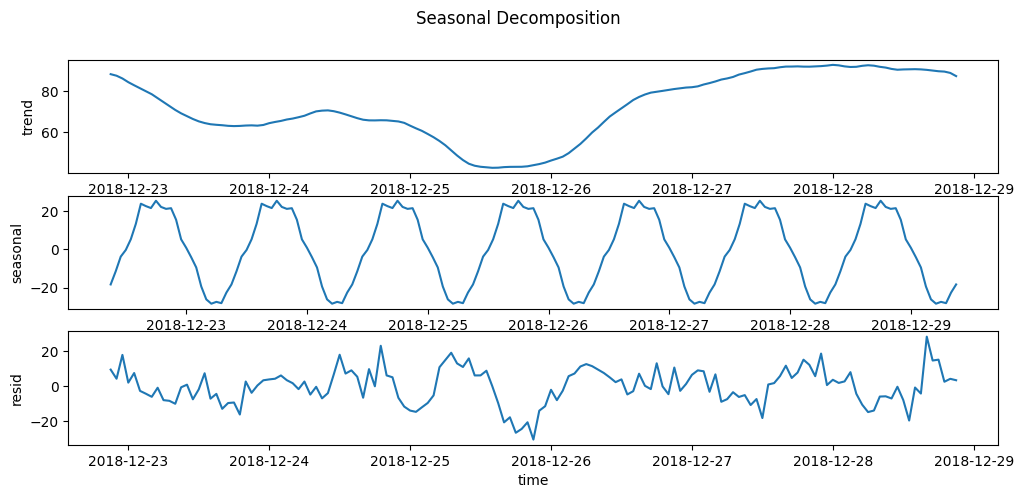

In [20]:
res = seasonal_decompose(df["users"])

fig, axes = plt.subplots(3,1,figsize=(12,5), squeeze=False)
sns.lineplot(res.trend, ax=axes[0,0])
sns.lineplot(res.seasonal, ax=axes[1,0])
sns.lineplot(res.resid, ax=axes[2,0])

plt.suptitle("Seasonal Decomposition")
plt.show()

- Daily seasonality is quite observable as there are peak hours within each day and low user numbers in certain hours of the day.
- Trend graph does not suggest an increasing or decreasing trend, this is probably related with the fact that the increase in app usage might take more time then what was given in our dataset. Also, the time period covers the Christmas holiday, so decrease in app usage might be related to this fact.
- Residual graph suggests that there is still information in residuals to be explained through other features.

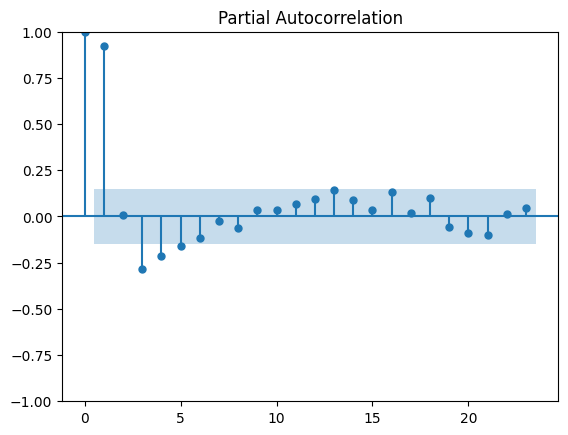

In [25]:
plot_pacf(df["users"], method="ywm")
plt.show()

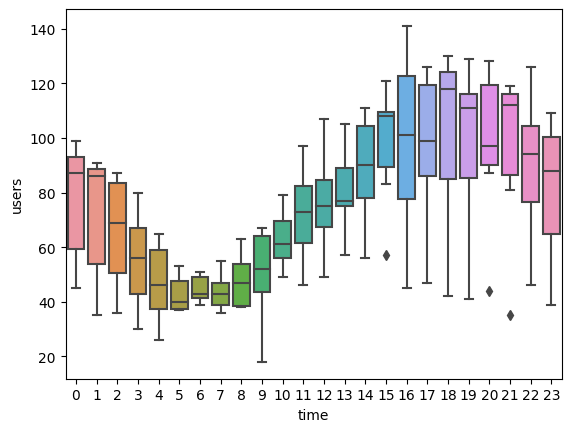

In [26]:
sns.boxplot(df, x=df.index.hour, y="users")
plt.show()